# Kaggle Sentiment Analysis Competition

In [35]:
# Playground
data.shape

(4189, 1001)

In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load training and test data (80/20 Split)
data = np.loadtxt("training_data.txt", delimiter="|", skiprows=1)
dataX = data[:, 0:-1]
dataY = data[:, -1]
training_size = int(data.shape[0] * 0.8)

trainingX = data[0:training_size, 0:-1]
trainingY = data[0:training_size, -1]

testX = data[training_size:, 0:-1]
testY = data[training_size:, -1]

# For testing for submission

test_data = np.loadtxt("testing_data.txt", delimiter="|", skiprows=1)

# Ridge Regression

In [108]:
# Fit Model
from sklearn.linear_model import RidgeClassifierCV

# lambdas 
lambdas_arr = np.arange(500, 1000, 0.1)

#clf = RidgeClassifierCV(alphas=lambdas_arr, cv=5)
#clf.fit(dataX, dataY)

In [110]:
#print clf.score(trainingX, trainingY)
#print clf.alpha_

In [99]:
# Ridge Prediction
prediction = clf.predict(test_data)

f = open("RidgeCV.csv", "w")
f.write("Id,Prediction\n")
for x in range(len(prediction)):
    f.write(str(x+1) + "," + str(int(prediction[x])) + "\n")
f.close()

# AdaBoost (Decision Tree)

In [149]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

training_arr = []
test_arr = []
estimator_arr = range(200, 1000, 10)

for i in estimator_arr:
    ada = AdaBoostClassifier(n_estimators=i, learning_rate=1)
    ada.fit(trainingX, trainingY)
    training_arr.append(ada.score(trainingX, trainingY))
    test_arr.append(ada.score(testX, testY))

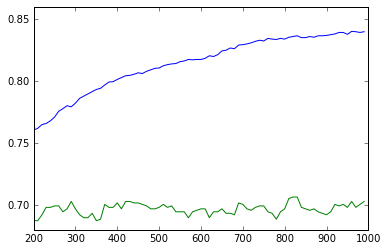

In [150]:
plt.plot(estimator_arr, training_arr)
plt.plot(estimator_arr, test_arr)
plt.show()

In [151]:
print np.argmax(np.array(test_arr))
print estimator_arr[np.argmax(np.array(test_arr))]

62
820


In [152]:
ada1 = AdaBoostClassifier(n_estimators=estimator_arr[np.argmax(np.array(test_arr))], learning_rate=1)
ada1.fit(trainingX, trainingY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=820, random_state=None)

In [146]:
prediction1 = ada1.predict(test_data)

f = open("AdaBoostDecisionTree.csv", "w")
f.write("Id,Prediction\n")
for x in range(len(prediction)):
    f.write(str(x+1) + "," + str(int(prediction1[x])) + "\n")
f.close()